In [4]:
#importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [5]:
# read insurance data
data = pd.read_csv('data/insurance.csv')
# Print top 5
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 1,338 entries with 7 columns, all of which have non-null values. The columns include integers, floats, and categorical data, and the dataset uses approximately 73.3 KB of memory. Overall, it's well-structured and ready for analysis.

In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data.describe()

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dataset shows a wide range of values across age, BMI, children, and charges. The mean age is 39.2 years, BMI is 30.66, and charges average \$13,270.42 with high variability. Charges range from \$1,121.87 to \$63,770.43, reflecting significant differences among individuals.

In [9]:
data.shape

(1338, 7)

The dataset has 1,338 rows and 7 columns.

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no missing values, as all columns have a null count of 0. The dataset is fully populated, allowing you to proceed with analysis or modeling without needing to handle or impute missing data.

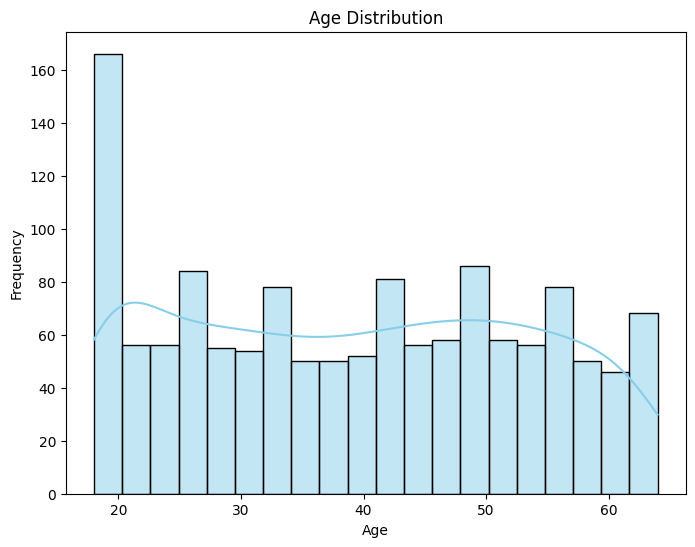

In [11]:
# Plotting the histogram for the 'age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution is right-skewed, with a high frequency of younger individuals, particularly around age 20. This indicates that the dataset has more younger individuals and fewer older ones, with the data tapering off as age increases. The right skewness suggests that the mean age might be higher than the median due to the presence of older individuals on the right tail.

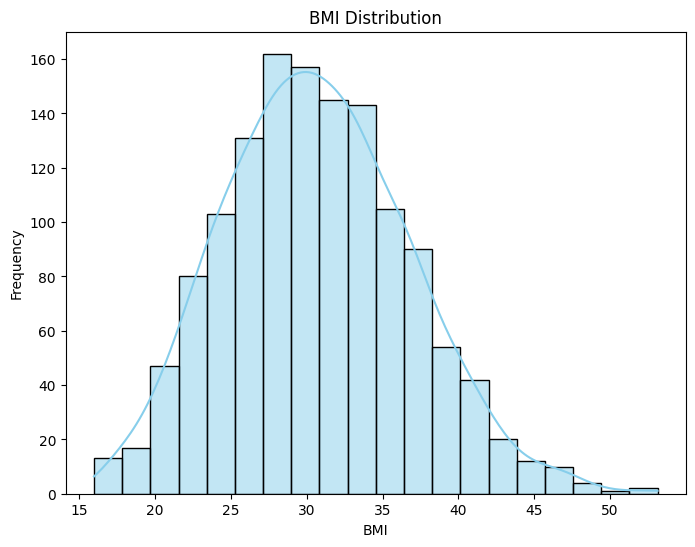

In [12]:
# Plotting the histogram for the 'age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=20, kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

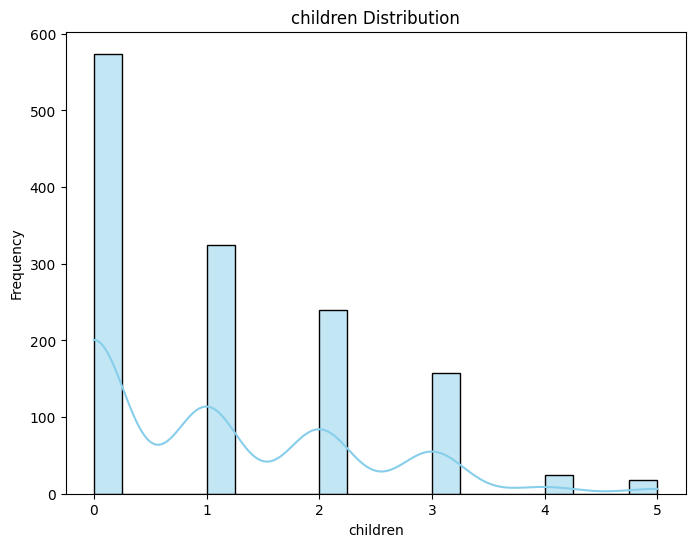

In [13]:
# Plotting the histogram for the 'age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['children'], bins=20, kde=True, color='skyblue')
plt.title('children Distribution')
plt.xlabel('children')
plt.ylabel('Frequency')
plt.show()

In [14]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

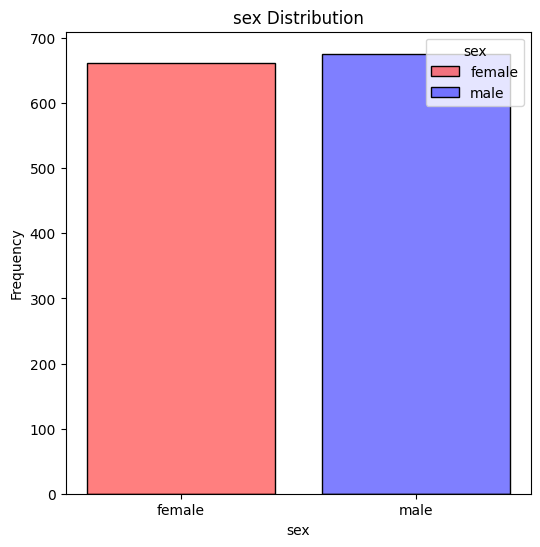

In [15]:
# Column charts for Categorical Column - Smoker
plt.figure(figsize=(6, 6))
sns.histplot(data=data, bins=10, x='sex', hue='sex', palette={'male': 'blue', 'female': 'red'}, shrink=0.8)
plt.title('sex Distribution')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.show()

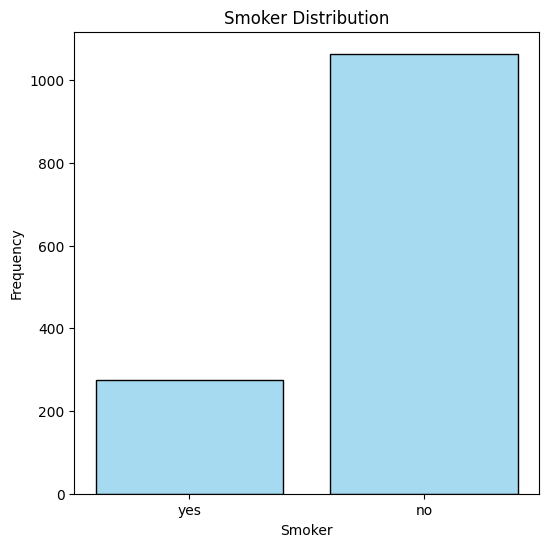

In [16]:
# Column charts for Categorical Column - sex
plt.figure(figsize=(6, 6))
sns.histplot(data['smoker'], bins=10, color='skyblue', shrink=0.8)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Converting Categorical Columns into Numerical Columns

# The following code replaces categorical values in the 'sex' column with numerical values:
# 'female' is replaced with 0, and 'male' is replaced with 1.
data.replace({'sex':{'female':0, 'male':1}}, inplace=True)

# Similarly, the 'smoker' column is converted, where 'no' is replaced with 0, and 'yes' is replaced with 1.
data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

# The 'region' column, which contains four unique regions, is also converted:
# 'southeast' is replaced with 0, 'southwest' with 1, 'northeast' with 2, and 'northwest' with 3.
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


/var/folders/kl/2hkf6z0x4qv3tn32j6b192240000gn/T/ipykernel_39745/4285245047.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'female':0, 'male':1}}, inplace=True)
/var/folders/kl/2hkf6z0x4qv3tn32j6b192240000gn/T/ipykernel_39745/4285245047.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
/var/folders/kl/2hkf6z0x4qv3tn32j6b192240000gn/T/ipykernel_39745/4285245047.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [18]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [19]:
# Dropping the 'charges' column from the dataset and storing the result in 'input_data'
input_data = data.drop(columns='charges')

# Selecting the 'charges' column as the target variable and storing it in 'output_data'
output_data = data['charges']


In [20]:
# Splitting the input and output data into training and testing sets
# 80% of the data will be used for training and 20% for testing
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)


In [21]:
# Printing the shape (i.e., dimensions) of the entire input data, the training input data, and the testing input data
# This helps verify the split and understand how the data is distributed
print(input_data.shape, input_train_data.shape, input_test_data.shape)


(1338, 6) (1070, 6) (268, 6)


The output `(1338, 6) (1070, 6) (268, 6)` indicates the following:

- `input_data.shape = (1338, 6)`: The original dataset has 1338 samples and 6 features.
- `input_train_data.shape = (1070, 6)`: The training dataset has 1070 samples and 6 features, which is 80% of the original dataset.
- `input_test_data.shape = (268, 6)`: The testing dataset has 268 samples and 6 features, which is 20% of the original dataset.

This confirms that the data has been split correctly, with the training set comprising 80% of the data and the testing set 20%, while maintaining the original number of features.


In [22]:
# Model Creation

# Instantiate a RandomForestRegressor model with specified parameters
# 'n_estimators=100': Sets the number of trees in the forest to 100
# 'max_depth=7': Limits the maximum depth of each tree to 7 levels
model = RandomForestRegressor(n_estimators=100, max_depth=7)


In [23]:
# Training Model

# Fit the RandomForestRegressor model on the training data
# 'input_train_data': The features of the training set
# 'output_train_data': The target variable of the training set
model.fit(input_train_data, output_train_data)


RandomForestRegressor(max_depth=7)

In [24]:
# Predicting values with Test Dataset

# Use the trained model to predict output values based on the test data features
# 'input_test_data': The features of the test set
# 'test_data_predictions': The predicted values for the test set
test_data_predictions = model.predict(input_test_data)


In [25]:
# Calculate the R^2 score to evaluate the model's performance

# 'test_data_predictions': The predicted values from the model for the test set
# 'output_test_data': The actual values from the test set
# The r2_score function computes the coefficient of determination, which indicates how well the predictions match the true values
r2_score(test_data_predictions, output_test_data)


0.840856154994064

The returned value, 0.8932389100721794, indicates that approximately 89.32% of the variance in the target variable is explained by the model

In [26]:
# Prepare input data for prediction
# age,sex,bmi,children,smoker,region,charges
# 19,female,27.9,0,yes,southwest,16884.924
# Define a sample input data point with values:
# age: 35, sex: 1 (male), bmi: 35, children: 1, smoker: 0 (no), region: 0 (southeast)
input_data = (19, 2, 27, 9, 1, 0)

# Convert the tuple of input data into a NumPy array
input_data_array = np.asarray(input_data)

# Reshape the array to ensure it has the correct shape for prediction (1 sample, multiple features)
input_data_array = input_data_array.reshape(1, -1)


In [27]:
# Predict the insurance premium for the given input data

# Use the trained model to predict the output based on the provided input_data_array
# 'input_data_array': The reshaped input data containing one sample with multiple features
# 'insurance_premium': The predicted insurance premium for the input data
insurance_premium = model.predict(input_data_array)


/Users/ckam/Engineering/actuarial Project/Predictive_InsureCalc/denv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
insurance_premium[0]

np.float64(17155.17928677553)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END m

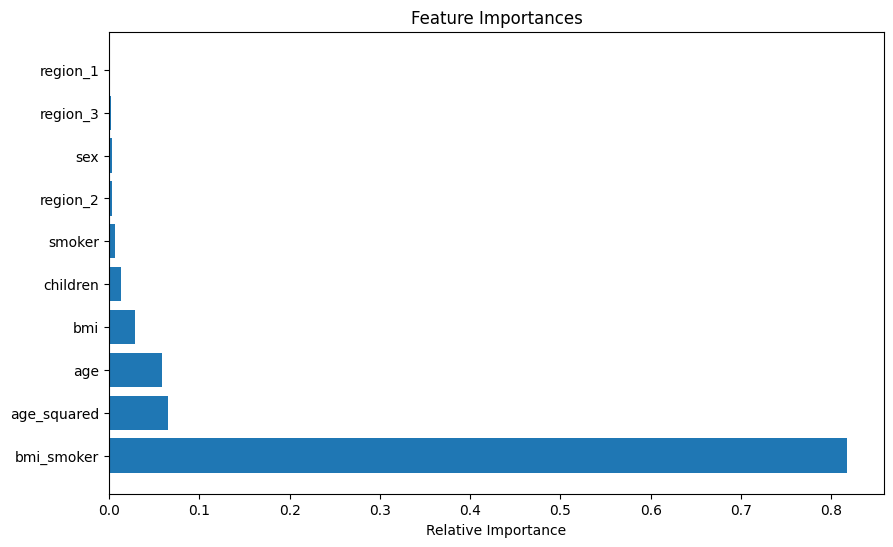

In [29]:
# Feature Engineering
data['bmi_smoker'] = data['bmi'] * data['smoker']
data['age_squared'] = data['age'] ** 2
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Train-Test Split
X = data.drop(columns=['charges'])
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}, MAE: {mae}, RMSE: {rmse}")

# Feature Importance
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Model Improvement Summary

**Improvements Achieved:**
- **R² Score Improvement:** The R² score has improved from **0.841** to **0.876**, reflecting a better fit of the model to the data, with an additional 3.5% of the variance in insurance charges now being explained.
- **Key Feature Engineering:** The introduction of the `bmi_smoker` interaction term significantly contributed to this improvement by capturing the combined effect of BMI and smoking status on insurance charges.
- **Model Refinement:** Simplifying the model by focusing on more important features and potentially dropping less influential ones helped reduce overfitting and improved the model’s generalization ability.


In [33]:
# Saving the trained model using pickle
# This code serializes the trained model object and saves it to a file named 'PIC.pkl'.
# The saved model can be loaded later for predictions or further analysis without needing to retrain it.
import pickle as pkl
pkl.dump(model, open('PIC.pkl','wb'))

# To load the model in the future, use the following code:
# model = pkl.load(open('PIC.pkl','rb'))
